# Coarsening on the ROMS C-Grid

In [1]:
from IPython.display import Image, display

# Display the image from the URL
display(Image(url='https://github.com/user-attachments/assets/3f8ca3be-8b17-4187-bb26-311ba41bf1d5'))

### Reading grid information and data

In [2]:
import xarray as xr

In [3]:
# Read grid information
ds_grid = xr.open_dataset("/glade/derecho/scratch/bachman/UCLA-ROMS/Work/Iceland1/INPUT/Iceland1_grd.nc")

In [4]:
ds_grid

<xarray.Dataset> Size: 96MB
Dimensions:       (one: 1, eta_rho: 1082, xi_rho: 1082, eta_coarse: 542,
                   xi_coarse: 542)
Dimensions without coordinates: one, eta_rho, xi_rho, eta_coarse, xi_coarse
Data variables: (12/19)
    spherical     (one) |S1 1B ...
    angle         (eta_rho, xi_rho) float64 9MB ...
    h             (eta_rho, xi_rho) float64 9MB ...
    hraw          (eta_rho, xi_rho) float64 9MB ...
    f             (eta_rho, xi_rho) float64 9MB ...
    pm            (eta_rho, xi_rho) float64 9MB ...
    ...            ...
    xy_flip       (one) float64 8B ...
    lon_coarse    (eta_coarse, xi_coarse) float64 2MB ...
    lat_coarse    (eta_coarse, xi_coarse) float64 2MB ...
    angle_coarse  (eta_coarse, xi_coarse) float64 2MB ...
    h_coarse      (eta_coarse, xi_coarse) float64 2MB ...
    mask_coarse   (eta_coarse, xi_coarse) float64 2MB ...
Attributes:
    Title:    ROMS grid by Easy Grid. Settings: nx: 1080 ny: 1080 xsize: 1080...
    Date:     26-Jul-2023
    Type:     ROMS grid produced by Easy Grid

In [5]:
# Read some data
ds = xr.open_dataset("/glade/derecho/scratch/bachman/UCLA-ROMS/run/Iceland1/AVG/Iceland1_avg.20120402000000.nc")

In [6]:
ds

<xarray.Dataset> Size: 2GB
Dimensions:     (time: 1, auxil: 6, eta_rho: 1082, xi_rho: 1082, s_rho: 100,
                 xi_u: 1081, eta_v: 1081, s_w: 101)
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, s_rho, xi_u,
                                eta_v, s_w
Data variables:
    ocean_time  (time) float64 8B ...
    time_step   (time, auxil) int32 24B ...
    zeta        (time, eta_rho, xi_rho) float32 5MB ...
    u           (time, s_rho, eta_rho, xi_u) float32 468MB ...
    v           (time, s_rho, eta_v, xi_rho) float32 468MB ...
    temp        (time, s_rho, eta_rho, xi_rho) float32 468MB ...
    salt        (time, s_rho, eta_rho, xi_rho) float32 468MB ...
    Akt         (time, s_w, eta_rho, xi_rho) float32 473MB ...
Attributes: (12/35)
    title:                 Iceland1 , 1.0km resolution
    grid_file:             /glade/derecho/scratch/bachman/UCLA-ROMS/Work/Icel...
    init_file:             /glade/derecho/scratch/bachman/UCLA-ROMS/Work/Icel...
    ntimes:                1441
    ndtfast:               80
    dt:                    60.0
    ...                    ...
    SRCS:                  KRNSRC param.F dimensions.F read_write.F ocean_var...
    CPPS:                  <cppdefs.opt> TWAKE DIAGNOSTICS TIDES BULK_FRC SPO...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_EAST, OBC_NORTH, OBC_SOUTH, OBC_M3O...
    git_version:           00d09a3fbd3fa41cc50b679742b7f4b4832d5df3
    type:                  ROMS averages file

### The `ROMSCoarsener` object

In [7]:
from coarsen import ROMSCoarsener

In [8]:
# Initialize ROMSCoarsener object with grid information
coarsener = ROMSCoarsener(ds_grid=ds_grid)

The `ROMSCoarsener` object will figure out whether you give it a tracer, u- or v-field. Let's try it out!

In [9]:
%time zeta_coarsened = coarsener(ds["zeta"], factor=4)

CPU times: user 45.1 ms, sys: 12.3 ms, total: 57.4 ms
Wall time: 114 ms


In [10]:
zeta_coarsened

<xarray.DataArray 'zeta' (time: 1, eta_rho: 272, xi_rho: 272)> Size: 592kB
array([[[-0.04358322, -0.04036059, -0.03193796, ..., -0.0032635 ,
         -0.02088521, -0.02755058],
        [-0.04029483, -0.03675318, -0.02802471, ..., -0.01812514,
         -0.03616688, -0.04292959],
        [-0.03219181, -0.02820193, -0.01919843, ..., -0.06044206,
         -0.07746118, -0.08431857],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -1.13828033,
         -1.14527529, -1.14697535],
        [ 0.        ,  0.        ,  0.        , ..., -1.14291806,
         -1.15368321, -1.15698397],
        [ 0.        ,  0.        ,  0.        , ..., -1.14365983,
         -1.15549156, -1.1593709 ]]])
Dimensions without coordinates: time, eta_rho, xi_rho
Attributes:
    long_name:  averaged free-surface elevation
    units:      meter

The coarsened SSH (a tracer field) has the same dimensions as the original SSH field: `eta_rho` and `xi_rho`, but the dimension lengths are reduced.

The 3D fields take a little more time:

In [11]:
%time temp_coarsened = coarsener(ds["temp"], factor=4)

CPU times: user 3.44 s, sys: 1.04 s, total: 4.49 s
Wall time: 5.96 s


In [14]:
temp_coarsened

<xarray.DataArray 'temp' (time: 1, s_rho: 100, eta_rho: 272, xi_rho: 272)> Size: 59MB
array([[[[ 5.17666388,  5.24125981,  5.35419524, ...,  4.11735642,
           4.39052331,  4.59001207],
         [ 5.13317972,  5.1994397 ,  5.30079782, ...,  4.39416838,
           4.61846134,  4.76513646],
         [ 5.09568737,  5.13852112,  5.22082501, ...,  4.58658601,
           4.919817  ,  5.12134603],
         ...,
         [ 0.        ,  0.        ,  0.        , ..., -0.79617555,
          -0.79313189, -0.78764791],
         [ 0.        ,  0.        ,  0.        , ..., -0.79227145,
          -0.79167452, -0.78405909],
         [ 0.        ,  0.        ,  0.        , ..., -0.79049884,
          -0.79150608, -0.78479195]],

        [[ 5.17659855,  5.24477613,  5.35706556, ...,  4.1257714 ,
           4.40424502,  4.59950352],
         [ 5.13075559,  5.19766277,  5.30086324, ...,  4.40081344,
           4.6276338 ,  4.77332304],
         [ 5.09342062,  5.13376182,  5.21843728, ...,  4.5898186 ,
           4.92743199,  5.12839487],
...
         [ 0.        ,  0.        ,  0.        , ..., -0.14239587,
          -0.09156378, -0.05223578],
         [ 0.        ,  0.        ,  0.        , ..., -0.08742591,
           0.01733804,  0.09732632],
         [ 0.        ,  0.        ,  0.        , ..., -0.07222047,
           0.07492024,  0.13793468]],

        [[ 6.10036516,  6.12414265,  6.15228033, ...,  6.27089405,
           6.25446606,  6.2256732 ],
         [ 6.06731545,  6.0742194 ,  6.10344083, ...,  6.19198109,
           6.15577044,  6.13104683],
         [ 6.012566  ,  6.03081527,  6.06276203, ...,  5.96789988,
           5.8892344 ,  5.83592627],
         ...,
         [ 0.        ,  0.        ,  0.        , ..., -0.15061574,
          -0.09937496, -0.05564909],
         [ 0.        ,  0.        ,  0.        , ..., -0.09592571,
           0.00936029,  0.09166295],
         [ 0.        ,  0.        ,  0.        , ..., -0.08522352,
           0.06340261,  0.12926216]]]])
Dimensions without coordinates: time, s_rho, eta_rho, xi_rho
Attributes:
    long_name:  averaged potential temperature
    units:      Celsius

The above example shos that the `ROMSCoarsener` does not only work for 2D fields, but will work for fields with arbitrary dimensions (3D, 4D, ...) - it will simply coarsen over the `eta` and `xi` dimensions.

In [12]:
%time u_coarsened = coarsener(ds["u"], factor=8)

CPU times: user 4.6 s, sys: 275 ms, total: 4.88 s
Wall time: 6.51 s


In [15]:
u_coarsened

<xarray.DataArray 'u' (eta_rho: 137, xi_u: 136, s_rho: 100, time: 1)> Size: 15MB
array([[[[-4.81898859e-02],
         [-5.44604696e-02],
         [-4.70809527e-02],
         ...,
         [-1.86051607e-01],
         [-1.72795489e-01],
         [-1.72469288e-01]],

        [[-6.88269734e-02],
         [-7.90981129e-02],
         [-7.18671754e-02],
         ...,
         [-1.72573894e-01],
         [-1.59201846e-01],
         [-1.58369124e-01]],

        [[-9.09841135e-02],
         [-1.00368276e-01],
         [-1.10764563e-01],
         ...,
...
         ...,
         [-1.69359997e-01],
         [-1.68171734e-01],
         [-1.62721768e-01]],

        [[ 3.40890400e-02],
         [ 2.30883062e-02],
         [ 8.91432445e-03],
         ...,
         [-2.45768614e-02],
         [-1.01664271e-02],
         [ 9.84991342e-03]],

        [[-3.19954492e-02],
         [-3.45149152e-02],
         [-4.45649885e-02],
         ...,
         [-5.63056534e-03],
         [-2.52063037e-03],
         [ 4.79096314e-03]]]])
Dimensions without coordinates: eta_rho, xi_u, s_rho, time
Attributes:
    long_name:  averaged u-momentum component
    units:      meter second-1

The coarsened u field has the same dimensions as the original u field: `eta_rho` and `xi_u`, but the dimension lengths are reduced.

In [16]:
%time v_coarsened = coarsener(ds["v"], factor=5)

CPU times: user 5.73 s, sys: 244 ms, total: 5.97 s
Wall time: 7.16 s


In [17]:
v_coarsened

<xarray.DataArray 'v' (time: 1, s_rho: 100, eta_v: 217, xi_rho: 218)> Size: 38MB
array([[[[-0.03517635, -0.01235616, -0.00752011, ..., -0.10701823,
          -0.20175693, -0.23284294],
         [-0.03859334,  0.00476228,  0.01751361, ..., -0.12184213,
          -0.16001761, -0.18592045],
         [ 0.00289867,  0.02908345,  0.04990651, ..., -0.08946302,
          -0.10741215, -0.1267529 ],
         ...,
         [ 0.        ,  0.        ,  0.        , ..., -0.10304891,
          -0.08303564, -0.1072291 ],
         [ 0.        ,  0.        ,  0.        , ..., -0.12699076,
          -0.11646903, -0.13105483],
         [ 0.        ,  0.        ,  0.        , ..., -0.13633596,
          -0.1181637 , -0.10335612]],

        [[-0.04658065, -0.01996994, -0.01397438, ..., -0.12563717,
          -0.23228129, -0.26333252],
         [-0.04965669, -0.00866311,  0.00725875, ..., -0.12985455,
          -0.17703625, -0.20426235],
         [-0.0123587 ,  0.01674192,  0.03958847, ..., -0.09195996,
          -0.11385603, -0.13302545],
...
         [ 0.        ,  0.        ,  0.        , ..., -0.1828708 ,
          -0.16625758, -0.06871578],
         [ 0.        ,  0.        ,  0.        , ..., -0.16867313,
          -0.1835529 , -0.09628528],
         [ 0.        ,  0.        ,  0.        , ..., -0.15206899,
          -0.18376182, -0.18462865]],

        [[ 0.10885269,  0.13196858,  0.16319171, ..., -0.13370356,
          -0.17623318, -0.20313305],
         [ 0.1320999 ,  0.16409681,  0.20042614, ..., -0.14459388,
          -0.17267454, -0.21459244],
         [ 0.19885284,  0.20931428,  0.22850775, ..., -0.16261584,
          -0.16315777, -0.21029454],
         ...,
         [ 0.        ,  0.        ,  0.        , ..., -0.21689407,
          -0.20090801, -0.10352331],
         [ 0.        ,  0.        ,  0.        , ..., -0.20049294,
          -0.2162238 , -0.13362904],
         [ 0.        ,  0.        ,  0.        , ..., -0.18411207,
          -0.21505264, -0.21755004]]]])
Dimensions without coordinates: time, s_rho, eta_v, xi_rho
Attributes:
    long_name:  averaged v-momentum component
    units:      meter second-1

The coarsened v field has the same dimensions as the original v field: `eta_v` and `xi_rho`, but the dimension lengths are reduced.

### Some plots

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Sea surface height')

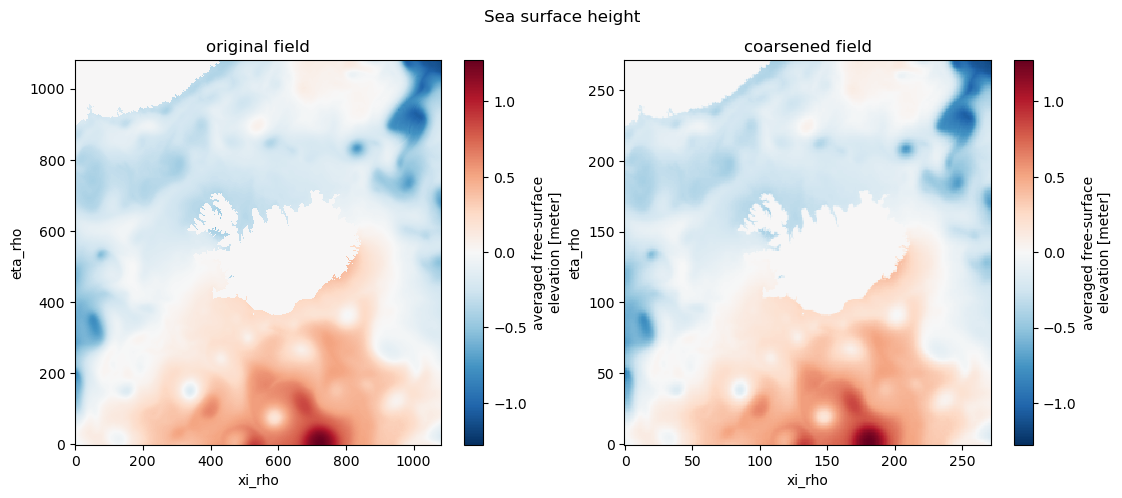

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

ds["zeta"].plot(ax=axs[0])
axs[0].set_title("original field")
zeta_coarsened.plot(ax=axs[1])
axs[1].set_title("coarsened field")

fig.suptitle("Sea surface height")

Text(0.5, 0.98, 'Surface zonal velocity')

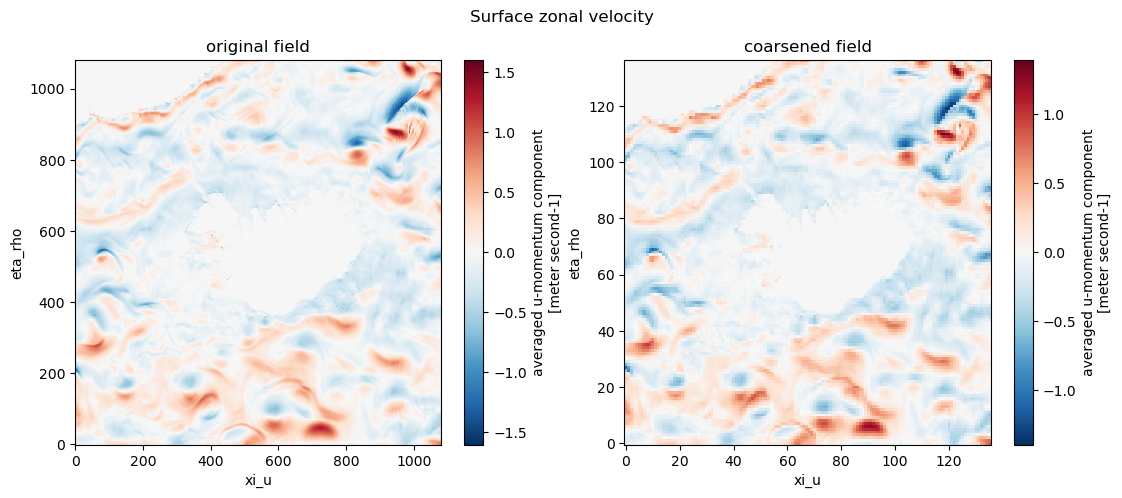

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

ds["u"].isel(s_rho=-1).plot(ax=axs[0])
axs[0].set_title("original field")
u_coarsened.isel(s_rho=-1).plot(ax=axs[1])
axs[1].set_title("coarsened field")

fig.suptitle("Surface zonal velocity")            

Text(0.5, 0.98, 'Surface meridional velocity')

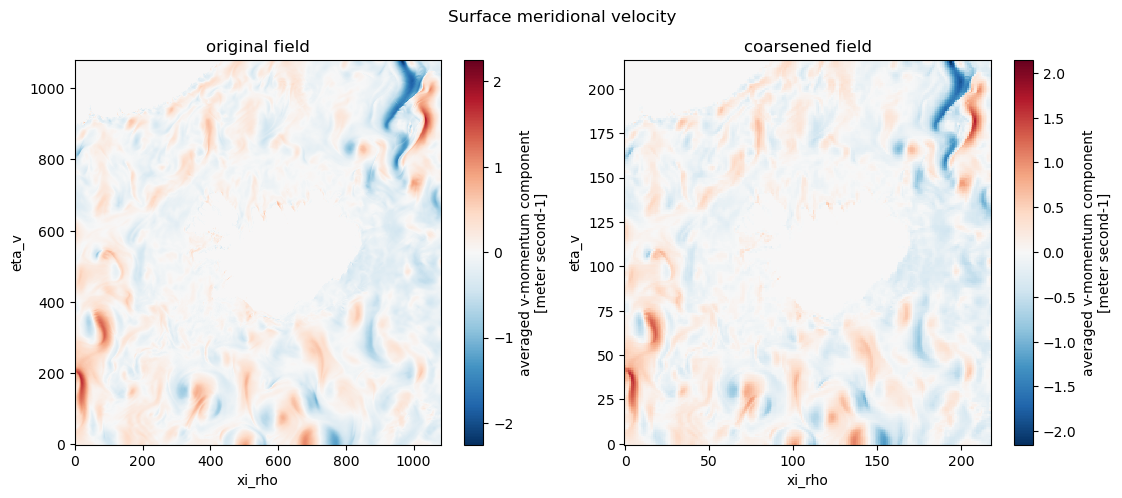

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

ds["v"].isel(s_rho=-1).plot(ax=axs[0])
axs[0].set_title("original field")
v_coarsened.isel(s_rho=-1).plot(ax=axs[1])
axs[1].set_title("coarsened field")

fig.suptitle("Surface meridional velocity")   

You will receive an error if you choose an invalid coarsening factor.

In [22]:
%time zeta_coarsened = coarsener(ds["zeta"], factor=7)

ValueError: Dimension (len(eta_rho) - 2) must be divisible by factor 7.